In [1]:
# Getting all assignment results in nucleiing 
import glob
import os
import numpy as np
def find_all_files (folder_path, file_name):
    # Define the folder to search in
    folder_path = path
    # Find all matching files
    matching_filenames = glob.glob(os.path.join(folder_path, '**', file_name), recursive=True)
    
    # Print the list of matching files
    for file in matching_filenames:
        print(file)
    return matching_filenames

In [3]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
wntP2_in_Nuclei_1= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Nuclei_1.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/565/results/concatenated_spot_in_nuclei.npy


In [4]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image2/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
wntP2_in_Nuclei_2= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Nuclei_2.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image2/565/results/concatenated_spot_in_nuclei.npy


In [5]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image3/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
wntP2_in_Nuclei_3= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Nuclei_3.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image3/565/results/concatenated_spot_in_nuclei.npy


In [6]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image4/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
wntP2_in_Nuclei_4= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Nuclei_4.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image4/565/results/concatenated_spot_in_nuclei.npy


In [7]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image5/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_nuclei.npy"))
wntP2_in_Nuclei_5= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Nuclei_5.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image5/565/results/concatenated_spot_in_nuclei.npy


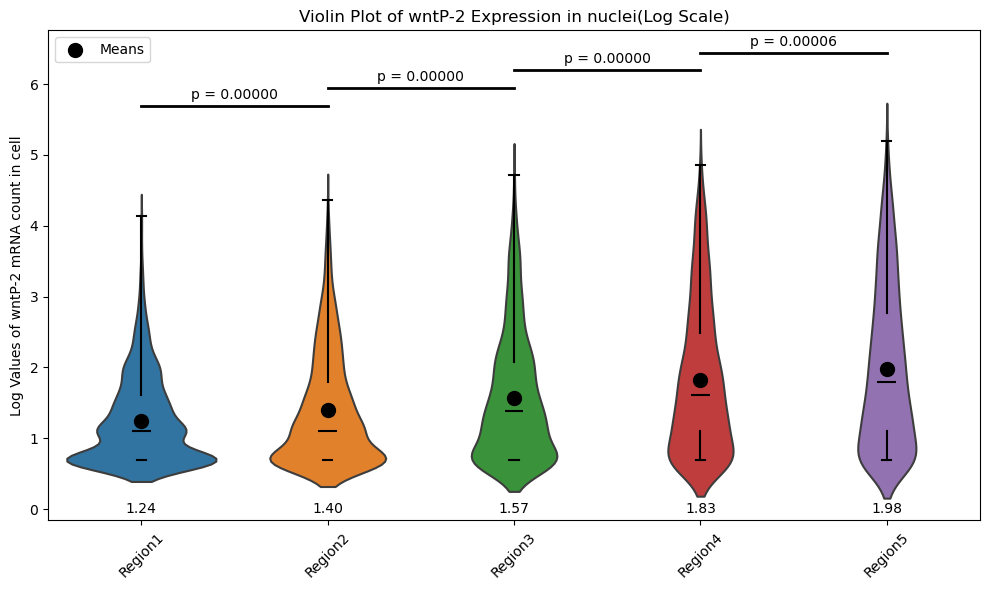

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["Region1", "Region2", "Region3", "Region4", "Region5"]

# Assuming your data arrays are already defined and concatenated
data_arrays = [wntP2_in_Nuclei_1[0], wntP2_in_Nuclei_2[0], wntP2_in_Nuclei_3[0], wntP2_in_Nuclei_4[0], wntP2_in_Nuclei_5[0]]

log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (0, 1),
    (1, 2),  # Incision 6h vs Amputation 6h
    (2, 3), 
    (3 ,4),
    # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of wntP-2 Expression in nuclei(Log Scale)')
plt.ylabel('Log Values of wntP-2 mRNA count in cell')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, -0.05, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("WntP2_Expression_Over_region_in_Nuclei.png")



In [33]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_counterstain.npy"))
wntP2_in_Counterstain_1= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Counterstain_1.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/565/results/concatenated_spot_in_counterstain.npy


In [34]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image2/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_counterstain.npy"))
wntP2_in_Counterstain_2= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Counterstain_2.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image2/565/results/concatenated_spot_in_counterstain.npy


In [35]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image3/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_counterstain.npy"))
wntP2_in_Counterstain_3= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Counterstain_3.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image3/565/results/concatenated_spot_in_counterstain.npy


In [36]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image4/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_counterstain.npy"))
wntP2_in_Counterstain_4= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Counterstain_4.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image4/565/results/concatenated_spot_in_counterstain.npy


In [37]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/565"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_in_counterstain.npy"))
wntP2_in_Counterstain_5= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    wntP2_in_Counterstain_5.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/565/results/concatenated_spot_in_counterstain.npy


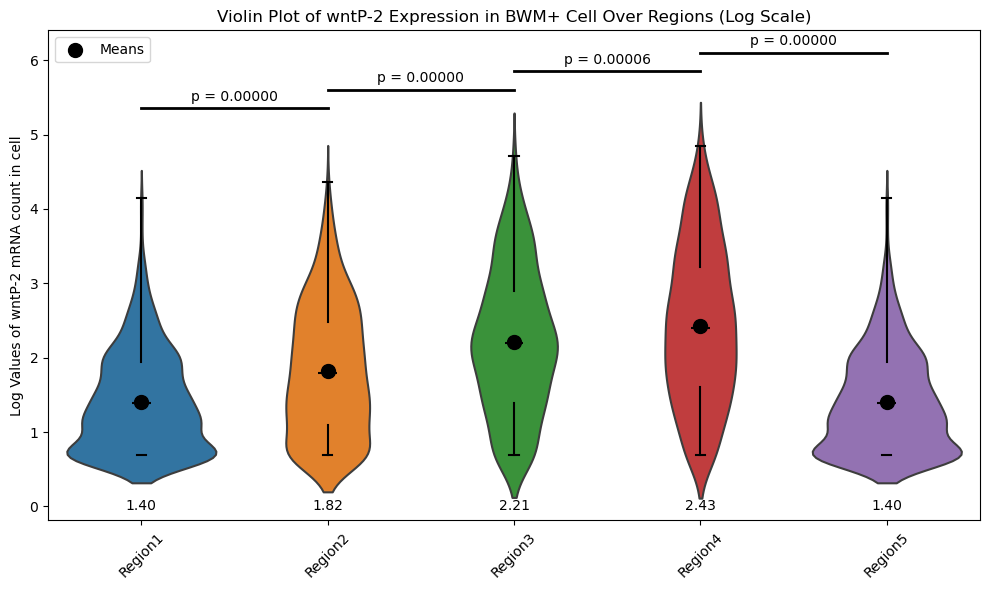

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["Region1", "Region2", "Region3", "Region4", "Region5"]

# Assuming your data arrays are already defined and concatenated
data_arrays = [wntP2_in_Counterstain_1[0], wntP2_in_Counterstain_2[0], wntP2_in_Counterstain_3[0], wntP2_in_Counterstain_4[0], wntP2_in_Counterstain_5[0]]

log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (0, 1),
    (1, 2),  # Incision 6h vs Amputation 6h
    (2, 3), 
    (3 ,4),
    # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of wntP-2 Expression in BWM+ Cell Over Regions (Log Scale)')
plt.ylabel('Log Values of wntP-2 mRNA count in cell')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, -0.05, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("WntP2_Expression_Over_region_in_BWM_cell.png")

In [47]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/633"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
BWM_in_Nuclei_1= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    BWM_in_Nuclei_1.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image1/633/results/concatenated_spot_counterstain.npy


In [48]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image2/633"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
BWM_in_Nuclei_2= []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    BWM_in_Nuclei_2.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image2/633/results/concatenated_spot_counterstain.npy


In [49]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image3/633"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
BWM_in_Nuclei_3 = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    BWM_in_Nuclei_3.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image3/633/results/concatenated_spot_counterstain.npy


In [50]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image4/633"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
BWM_in_Nuclei_4 = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    BWM_in_Nuclei_4.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image4/633/results/concatenated_spot_counterstain.npy


In [51]:
path = "/Users/eliasguan/Desktop/EG_1112_WntP2/Image5/633"
spot_in_nuclei = sorted(find_all_files (path, "concatenated_spot_counterstain.npy"))
BWM_in_Nuclei_5 = []
for i in range(len(spot_in_nuclei)):
    
    cells = np.load(spot_in_nuclei[i])
    cells = cells[cells > 0]
    BWM_in_Nuclei_5.append(cells)

/Users/eliasguan/Desktop/EG_1112_WntP2/Image5/633/results/concatenated_spot_counterstain.npy


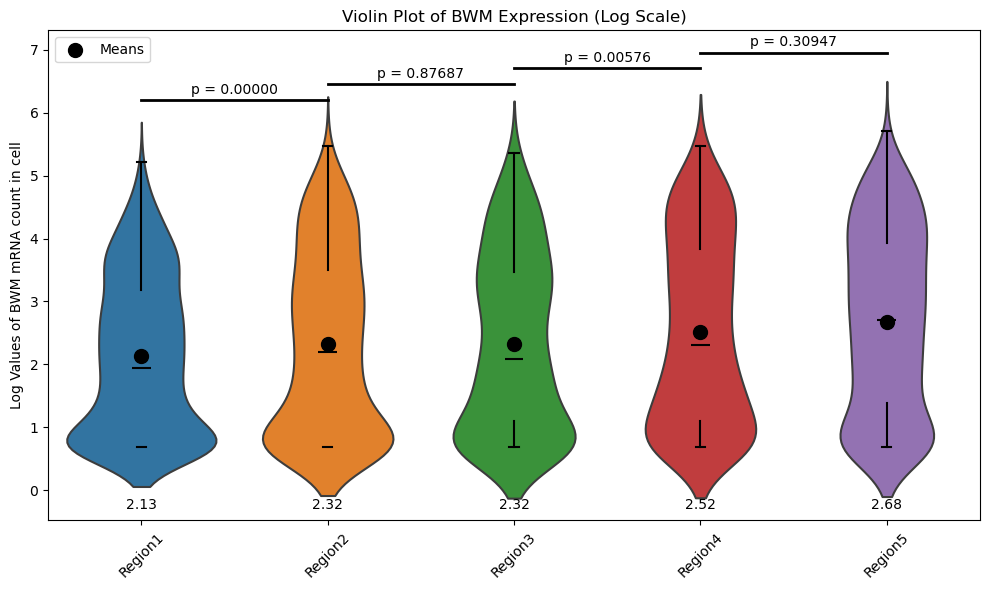

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the x-axis labels for each dataset
x_labels = ["Region1", "Region2", "Region3", "Region4", "Region5"]

# Assuming your data arrays are already defined and concatenated
data_arrays = [BWM_in_Nuclei_1[0], BWM_in_Nuclei_2[0], BWM_in_Nuclei_3[0], BWM_in_Nuclei_4[0], BWM_in_Nuclei_5[0]]

log_data_arrays = [np.log1p(data) for data in data_arrays]  # log1p handles zero values

# Perform t-tests only for the specified pairs and store results
pairs = [
    (0, 1),
    (1, 2),  # Incision 6h vs Amputation 6h
    (2, 3), 
    (3 ,4),
    # Amputation 6h vs Amputation 12h
]

results = {}
for i, j in pairs:
    t_stat, p_value = stats.ttest_ind(data_arrays[i], data_arrays[j], equal_var=False)
    results[f"{x_labels[i]} vs {x_labels[j]}"] = p_value  # Store only p-values for plotting

# Plot setup
fig = plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=log_data_arrays, inner=None)

# Overlay the mean values using scatter directly on the violin plot
means = [np.mean(data) for data in log_data_arrays]
plt.scatter(x=np.arange(len(x_labels)), y=means, color='black', s=100, label='Means', zorder=5)  # Black points for means

# Add boxplot overlay
sns.boxplot(data=log_data_arrays, whis=np.inf, color='k', width=0.1)

# Customize the x-axis
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Add labels and title
plt.title('Violin Plot of BWM Expression (Log Scale)')
plt.ylabel('Log Values of BWM mRNA count in cell')

# Add t-test annotations for the specific comparisons
y_max = np.max([np.max(data) for data in log_data_arrays])  # Get the maximum y value for positioning
y_offset = 0.5  # Base offset for annotations
increment = 0.25  # Increment to space out p-values

for index, (key, p_value) in enumerate(results.items()):
    x1, x2 = pairs[index]  # Get the indices for the datasets being compared
    y_pos = y_max + y_offset + (increment * index)  # Adjust vertical position based on index

    # Calculate the average position between the two datasets for line placement
    avg_pos = (x1 + x2) / 2   # Center between the x-coordinates of the two datasets

    # Center the line between the two datasets
    plt.plot([x1 , x2], [y_pos, y_pos], color='k', linewidth=2)  # Centered line
    plt.text(avg_pos, y_pos + 0.10, f"p = {p_value:.5f}", ha='center')  # Add p-value text at average position

# Annotate mean values on the plot in the middle of the whole figure
mean_y_position = np.mean(means)  # Calculate the mean of the mean values for positioning
for i, mean in enumerate(means):
    plt.text(i, -0.3, f"{mean:.2f}", ha='center', color='black', fontsize=10)  # Annotate means

# Show plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
fig.savefig("BWM_Expression_Over_regions.png")